In [38]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
# settings
sns.set_style("darkgrid")
figure_path = "figs" + os.sep
ID = "0414"

In [40]:
print(sns.color_palette('colorblind').as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


In [41]:
# ID = "0412_endOfDay"
# file_name = "../results/results_" + ID + ".csv"
# data = pd.read_csv(file_name, index_col = None)

In [42]:
directory = "../results/results_" + ID
idx = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if not filename.endswith(".csv"):
        continue
    newdata = pd.read_csv(f, index_col = None)
    if idx == 0:
        data = newdata
    else:
        data = pd.concat([data, newdata], ignore_index=True)
    idx += 1

In [43]:

av_data = data.groupby(["init_tom", "resp_tom", "init_canLie", "resp_canLie"]).mean()
# data = data[data["outcome"]] only configure situations where there is a better outcome.
data.head()

,init_tom,resp_tom,init_lr,resp_lr,init_canLie,resp_canLie,init_initPoints,resp_initPoints,init_finalPoints,resp_finalPoints,init_gain,resp_gain,nr_offers,outcome_is_PE,is_best_sw_outcome,negotiation_success,there_is_better_outcome,reached_max_num_offers,passed_time
0,0,0,0.5,0.5,False,False,300,300,346,796,46,496,4,True,True,True,True,False,0.58
1,0,0,0.5,0.5,False,False,850,300,846,296,-4,-4,4,False,False,False,True,False,-1.00
2,0,0,0.5,0.5,False,False,300,200,297,197,-3,-3,3,True,True,True,False,False,-1.00
3,0,0,0.5,0.5,False,False,350,250,897,297,547,47,3,True,True,True,True,False,-1.00
4,0,0,0.5,0.5,False,False,300,900,297,897,-3,-3,3,True,True,True,False,False,-1.00


In [44]:
df_init0 = data.loc[(data["init_tom"] == 0) & (data["init_canLie"] == False)] # & (data["there_is_better_outcome"] == True)
df_init1 = data.loc[(data["init_tom"] == 1) & (data["init_canLie"] == False)]
df_init2 = data.loc[(data["init_tom"] == 2) & (data["init_canLie"] == False)]
df_init2lying = data.loc[(data["init_tom"] == 2) & (data["init_canLie"] == True)]

df_resp0 = data.loc[(data["resp_tom"] == 0) & (data["resp_canLie"] == False)]
df_resp1 = data.loc[(data["resp_tom"] == 1) & (data["resp_canLie"] == False)]
df_resp2 = data.loc[(data["resp_tom"] == 2) & (data["resp_canLie"] == False)]
df_resp2lying = data.loc[(data["resp_tom"] == 2) & (data["resp_canLie"] == True)]

In [45]:
# BOXPLOT
# df_init0_mean = df_init0.groupby(["resp_tom", "resp_canLie"]).mean()
# df_init0_se = df_init0.groupby(["resp_tom", "resp_canLie"]).sem()
# names = ["ToM=" + ",\nlying=".join(map(str, name)) for name in list(df_init0_mean.index)]

# plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
# plt.bar(names, df_init0_mean["init_gain"], width = 0.4)
# plt.errorbar(names, df_init0_mean["init_gain"], yerr=df_init0_se["init_gain"], fmt='.', ecolor='red', color='blue')
# plt.ylabel('Initiator gain', size=16)
# plt.xlabel('Responder type', labelpad=10, size=16)

In [46]:
# figure settings
figsize = (10,10)
bin_widths = 0.8
label_names = ["ToM=0,canLie=False", "ToM=1,canLie=False", "ToM=2,canLie=False", "ToM=2,canLie=True"]
fig_label_names = ["ToM=0,\ncan lie=False", "ToM=1,\ncan lie=False", "ToM=2,\ncan lie=False", "ToM=2,\ncan lie=True"]
TICK_SIZE = 24

LABEL_SIZE = 30
TITLE_SIZE = 30
RIGHT_LIM = 900
LEFT_LIM = -100

meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=10)

In [47]:
# function for setting the colors of the box plots pairs
def make_box_plot(data, pos, ax):
    fill_colors = [sns.color_palette('colorblind')[0], sns.color_palette('colorblind')[1]]
    edge_colors = ["black", "black"]

    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True,
                    positions=pos, widths=bin_widths, showmeans=True, meanprops=meanpointprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'fliers', 'means']:
        plt.setp(bp[element][0], color=edge_colors[0])
        plt.setp(bp[element][1], color=edge_colors[1])

    bp['boxes'][0].set(facecolor=fill_colors[0])
    bp['boxes'][1].set(facecolor=fill_colors[1])
    
    return bp

def make_multiple_boxplots(df, y_label, title):
    box_plot_list = []
    for label_name in label_names:
        box_plot_list.append([list(df[df["id"] == label_name]["init_gain"]),
                              list(df[df["id"] == label_name]["resp_gain"])])
        
    fig = plt.figure(figsize = figsize)
    ax = fig.add_subplot(111)

    bp = make_box_plot(box_plot_list[0], [1,2], ax)
    bp = make_box_plot(box_plot_list[1], [4,5], ax)
    bp = make_box_plot(box_plot_list[2], [8,9], ax)
    bp = make_box_plot(box_plot_list[3], [11,12], ax)

    ax.set_yticks([1.5, 4.5, 8.5, 11.5])
    ax.set_yticklabels(fig_label_names)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    ax.set_xlim(left=LEFT_LIM, right=RIGHT_LIM)
    plt.legend((bp['boxes'][0], bp['boxes'][1], bp['means'][0]), ("Initiator", "Responder", "Mean value"), fontsize=TICK_SIZE, loc="center right")
    
    fig.supxlabel('Score gain', fontsize=LABEL_SIZE)
    fig.supylabel(y_label, x=0, fontsize=LABEL_SIZE)
    fig.suptitle(title, fontstyle='italic', fontsize=TITLE_SIZE)
    fig.tight_layout()

def make_boxplot_init(data, title):
    # https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
    df = data[["resp_tom", "resp_canLie", "init_gain", "resp_gain"]]
    df['id'] = "ToM=" + df['resp_tom'].astype(str) + ",canLie=" + df['resp_canLie'].astype(str)
    df = df[["id", "init_gain", "resp_gain"]]
    
    make_multiple_boxplots(df, "Responder type", title)
    
    
def make_boxplot_resp(data, title):

    df = data[["init_tom", "init_canLie", "init_gain", "resp_gain"]]
    df['id'] = "ToM=" + df['init_tom'].astype(str) + ",canLie=" + df['init_canLie'].astype(str)
    df = df[["id", "init_gain", "resp_gain"]]

    make_multiple_boxplots(df, "Initiator type", title)

C:\Users\sverr\AppData\Local\Temp\ipykernel_22180\3644667525.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = "ToM=" + df['resp_tom'].astype(str) + ",canLie=" + df['resp_canLie'].astype(str)


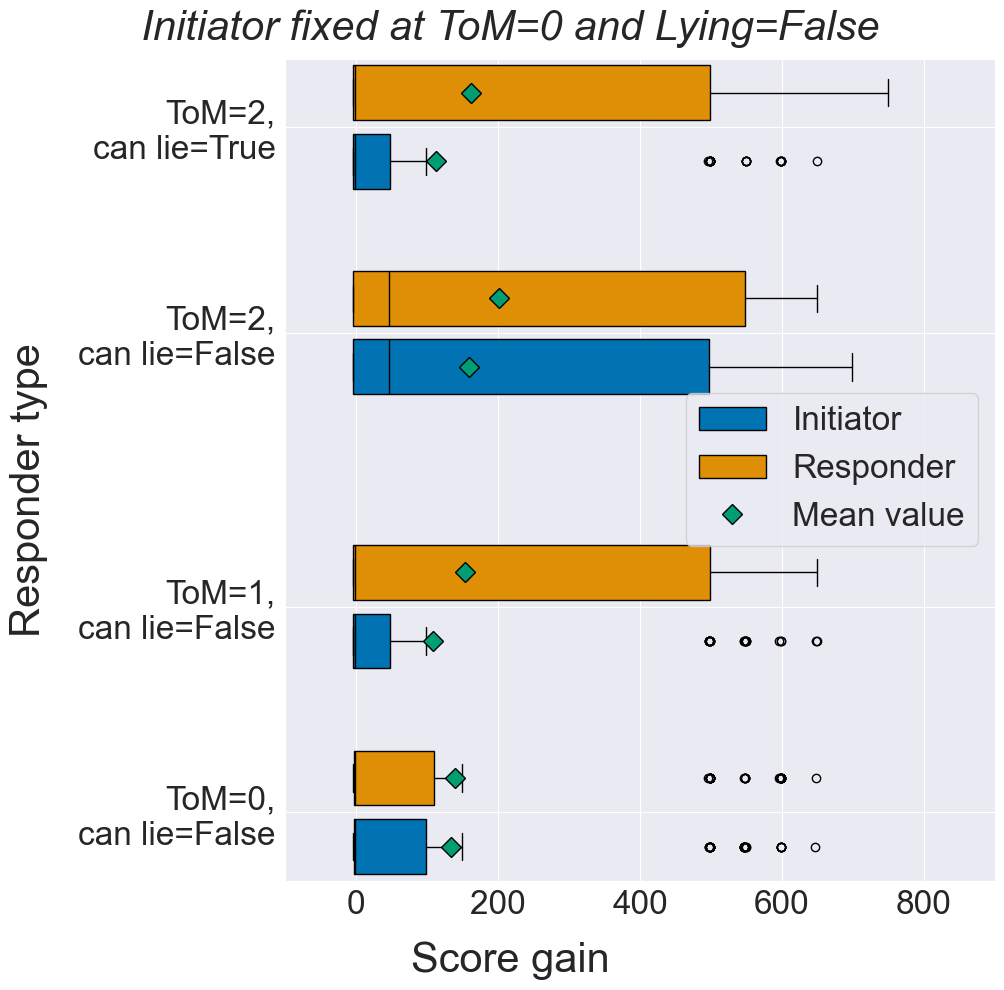

In [48]:
make_boxplot_init(df_init0, "Initiator fixed at ToM=0 and Lying=False")
plt.savefig(figure_path + "savedfig_init0_" + ID + ".pdf")
plt.show()

C:\Users\sverr\AppData\Local\Temp\ipykernel_22180\3644667525.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = "ToM=" + df['init_tom'].astype(str) + ",canLie=" + df['init_canLie'].astype(str)


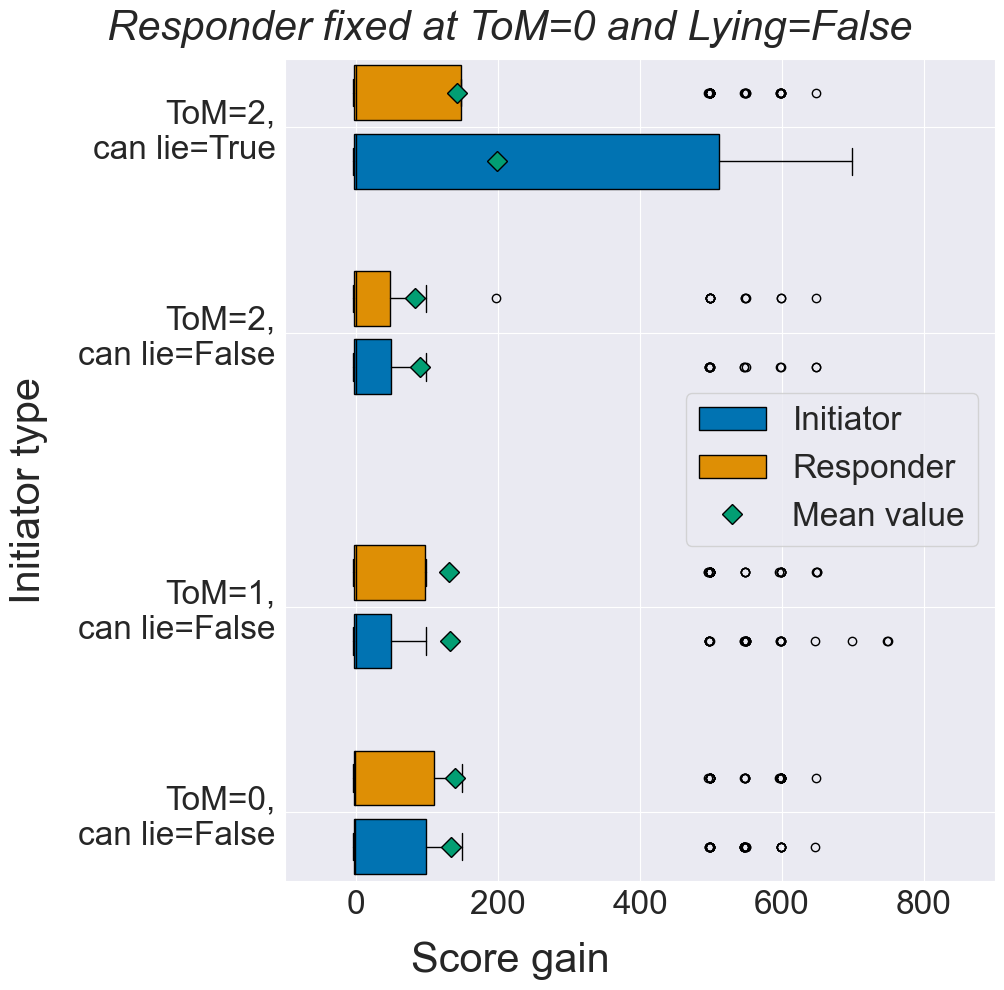

In [49]:
# print(df_resp0.describe())
make_boxplot_resp(df_resp0, "Responder fixed at ToM=0 and Lying=False")
plt.savefig(figure_path + "savedfig_resp0_" + ID + ".pdf")
plt.show()


C:\Users\sverr\AppData\Local\Temp\ipykernel_22180\3644667525.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = "ToM=" + df['resp_tom'].astype(str) + ",canLie=" + df['resp_canLie'].astype(str)


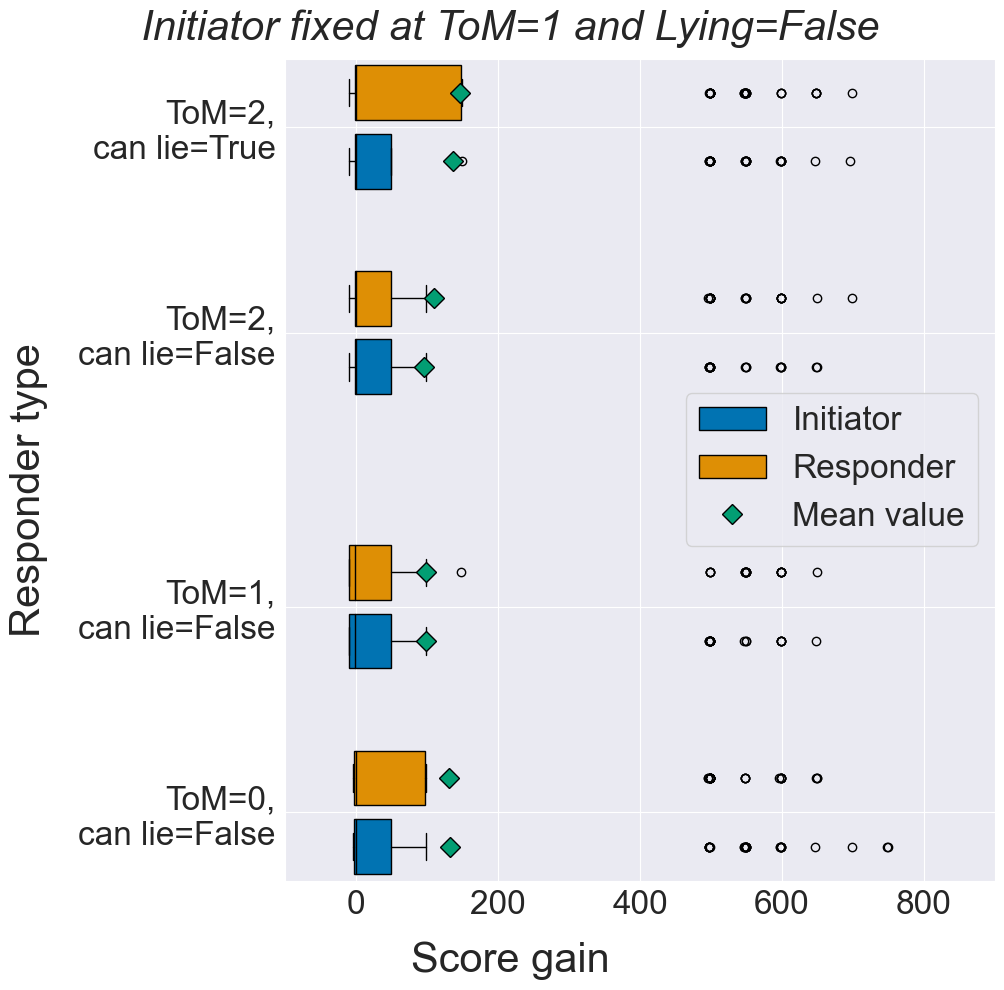

In [50]:
make_boxplot_init(df_init1, "Initiator fixed at ToM=1 and Lying=False")
plt.savefig(figure_path + "savedfig_init1_" + ID + ".pdf")
plt.show()

C:\Users\sverr\AppData\Local\Temp\ipykernel_22180\3644667525.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = "ToM=" + df['init_tom'].astype(str) + ",canLie=" + df['init_canLie'].astype(str)


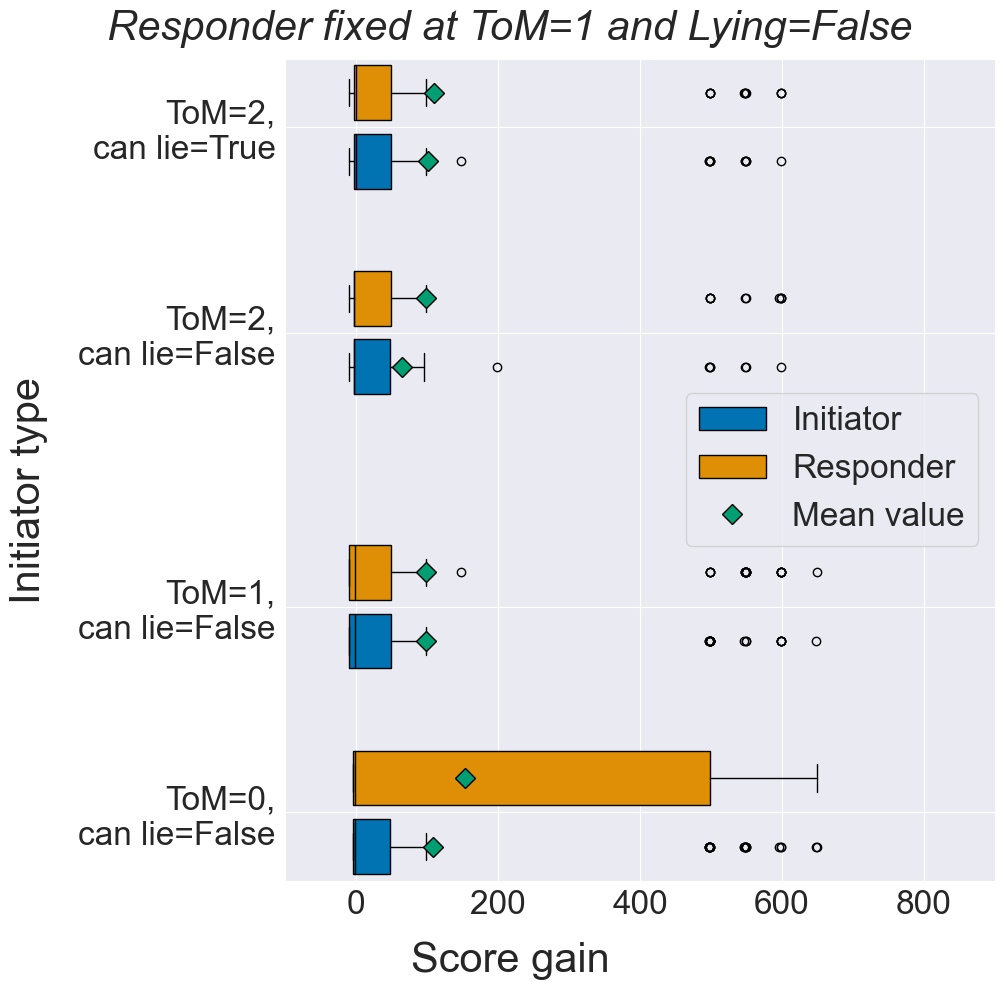

In [51]:
make_boxplot_resp(df_resp1, "Responder fixed at ToM=1 and Lying=False")
plt.savefig(figure_path + "savedfig_resp1_" + ID + ".pdf")
plt.show()

C:\Users\sverr\AppData\Local\Temp\ipykernel_22180\3644667525.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = "ToM=" + df['resp_tom'].astype(str) + ",canLie=" + df['resp_canLie'].astype(str)


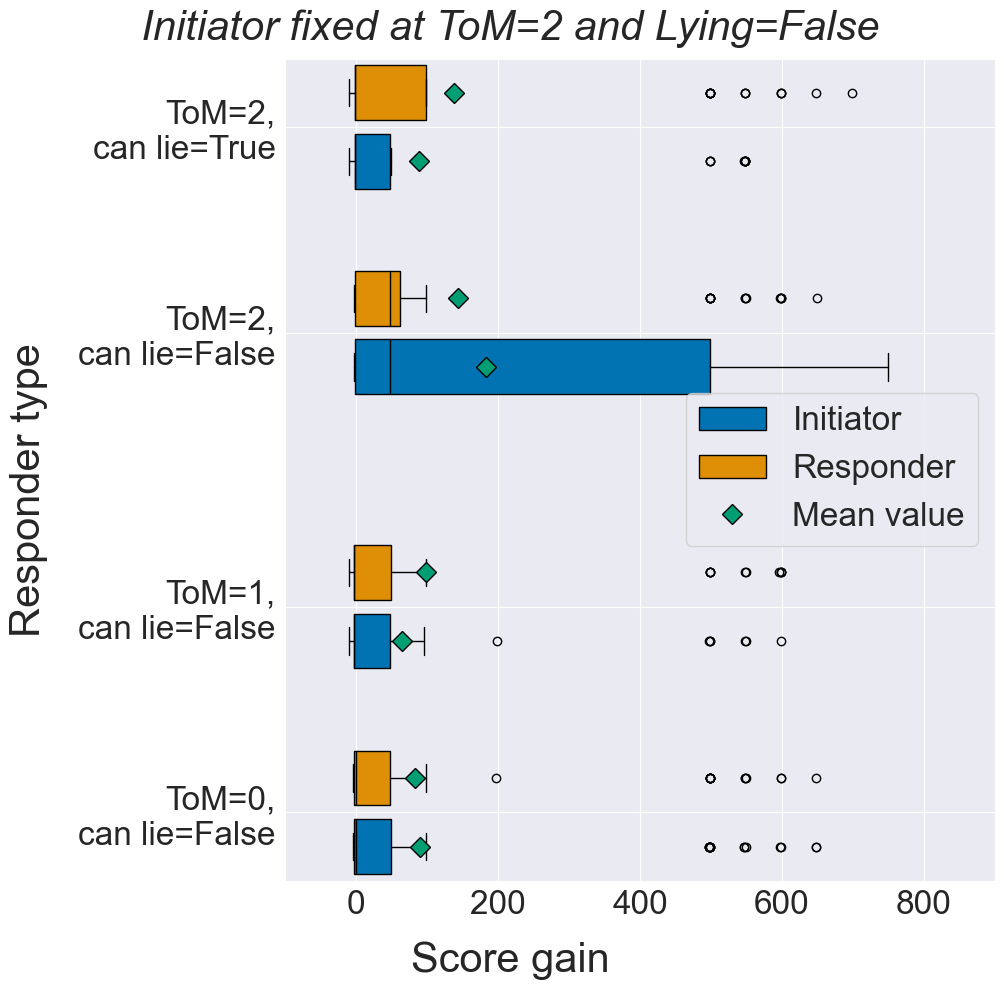

In [52]:
make_boxplot_init(df_init2, "Initiator fixed at ToM=2 and Lying=False")
plt.savefig(figure_path + "savedfig_init2_" + ID + ".pdf")
plt.show()

C:\Users\sverr\AppData\Local\Temp\ipykernel_22180\3644667525.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = "ToM=" + df['init_tom'].astype(str) + ",canLie=" + df['init_canLie'].astype(str)


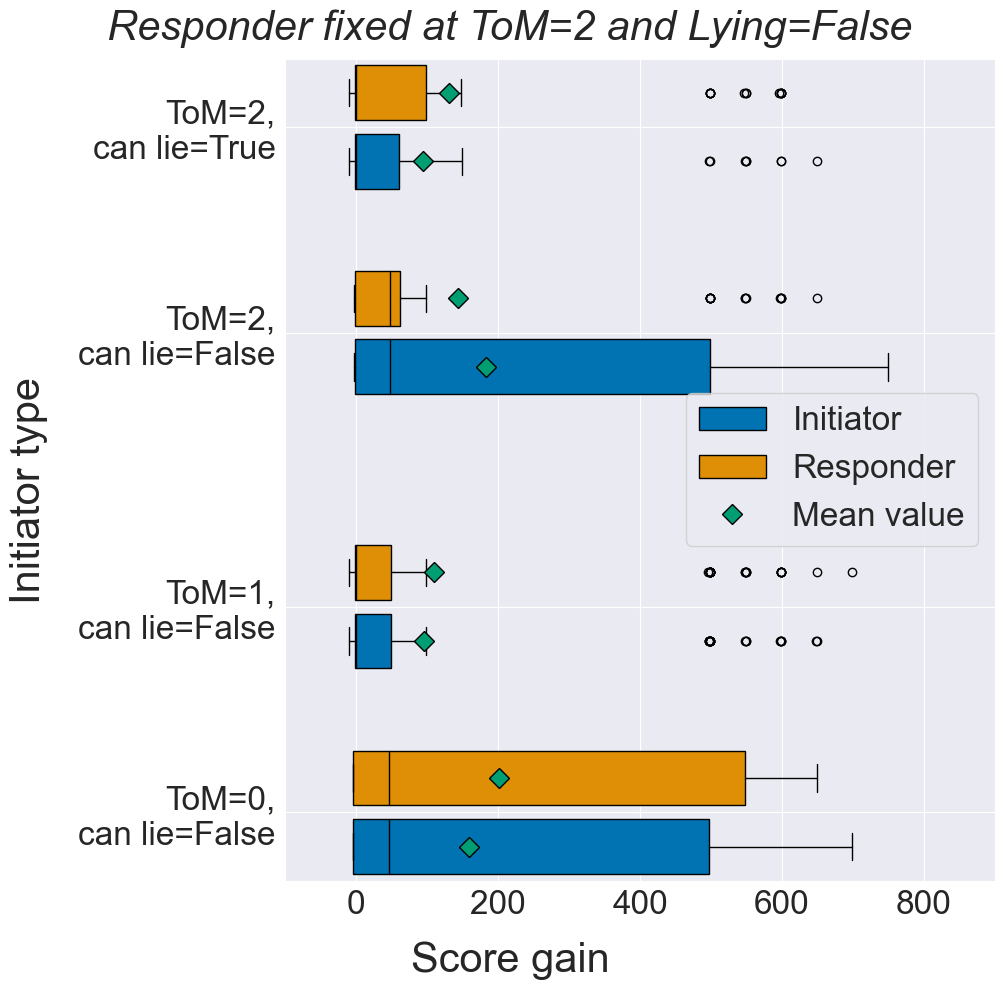

In [53]:
make_boxplot_resp(df_resp2, "Responder fixed at ToM=2 and Lying=False")
plt.savefig(figure_path + "savedfig_resp2_" + ID + ".pdf")
plt.show()

C:\Users\sverr\AppData\Local\Temp\ipykernel_22180\3644667525.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = "ToM=" + df['resp_tom'].astype(str) + ",canLie=" + df['resp_canLie'].astype(str)


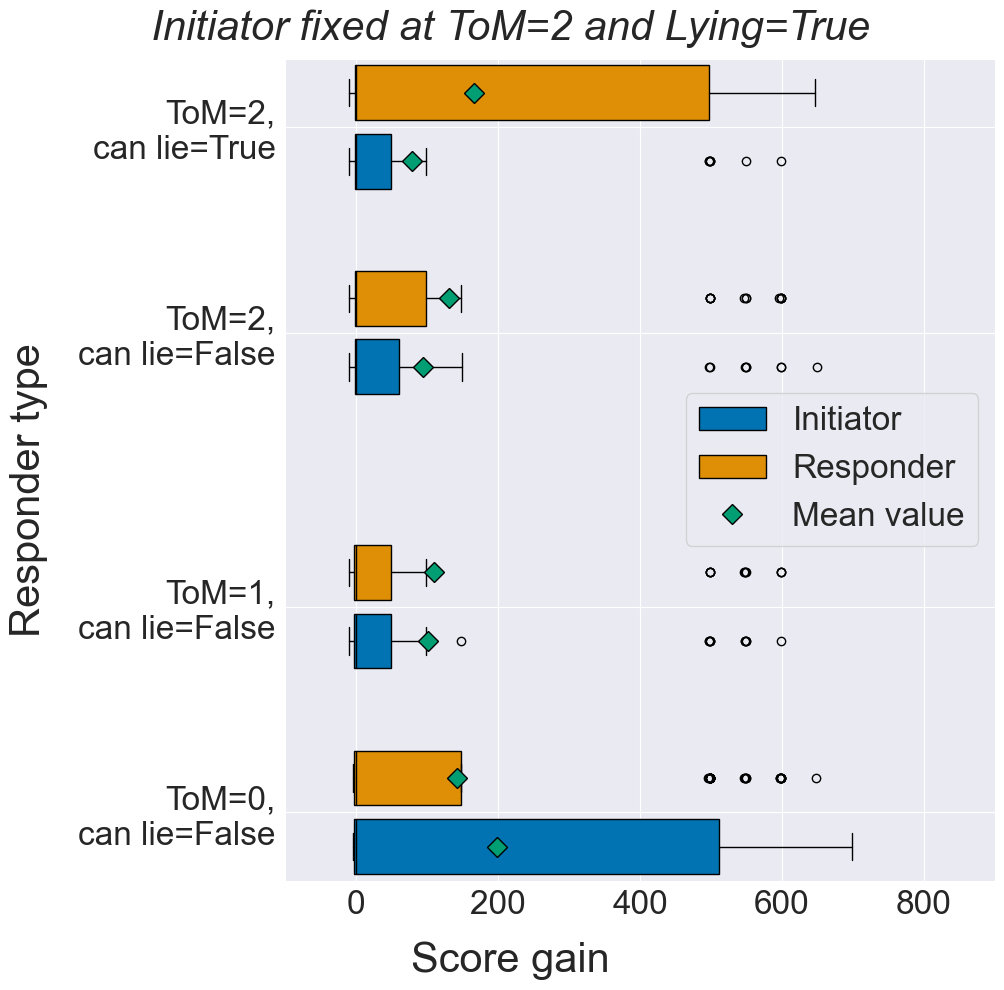

In [54]:
make_boxplot_init(df_init2lying, "Initiator fixed at ToM=2 and Lying=True")
plt.savefig(figure_path + "savedfig_init2lying_" + ID + ".pdf")
plt.show()

C:\Users\sverr\AppData\Local\Temp\ipykernel_22180\3644667525.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = "ToM=" + df['init_tom'].astype(str) + ",canLie=" + df['init_canLie'].astype(str)


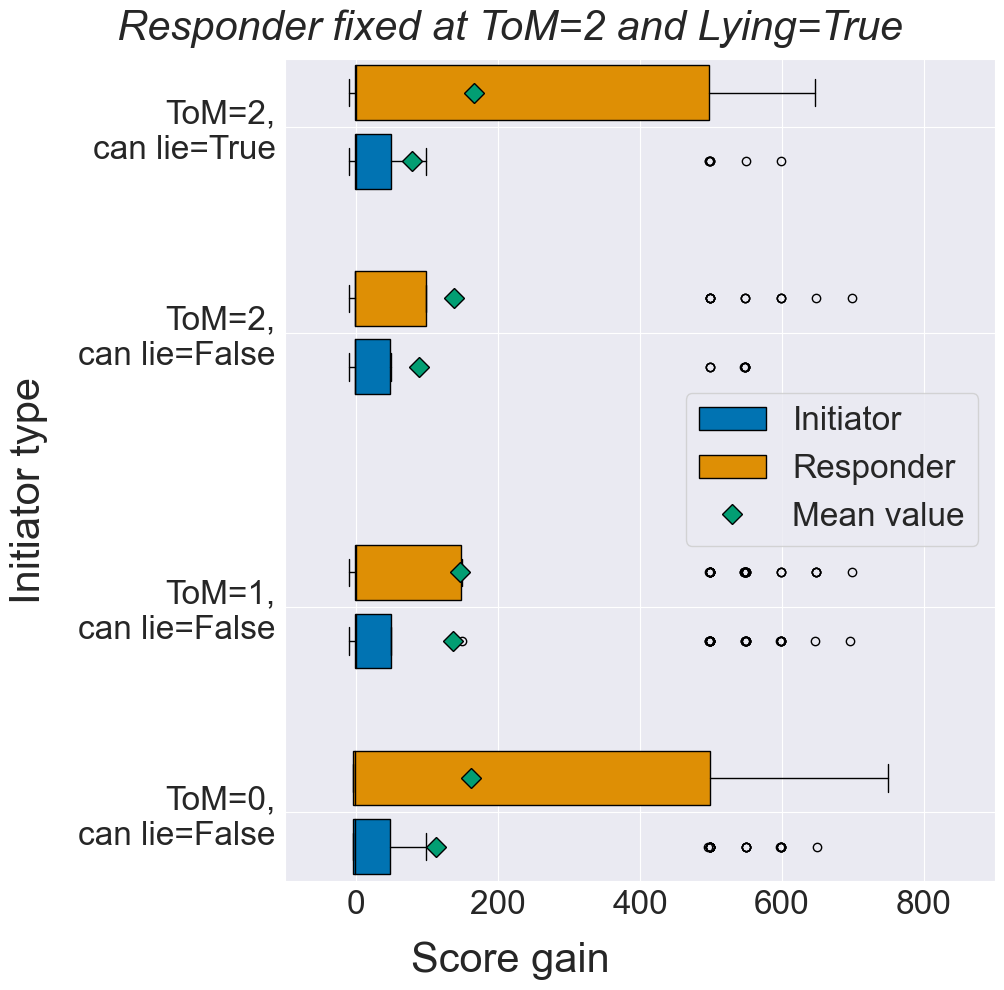

In [55]:
make_boxplot_resp(df_resp2lying, "Responder fixed at ToM=2 and Lying=True")
plt.savefig(figure_path + "savedfig_resp2lying_" + ID + ".pdf")
plt.show()